In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

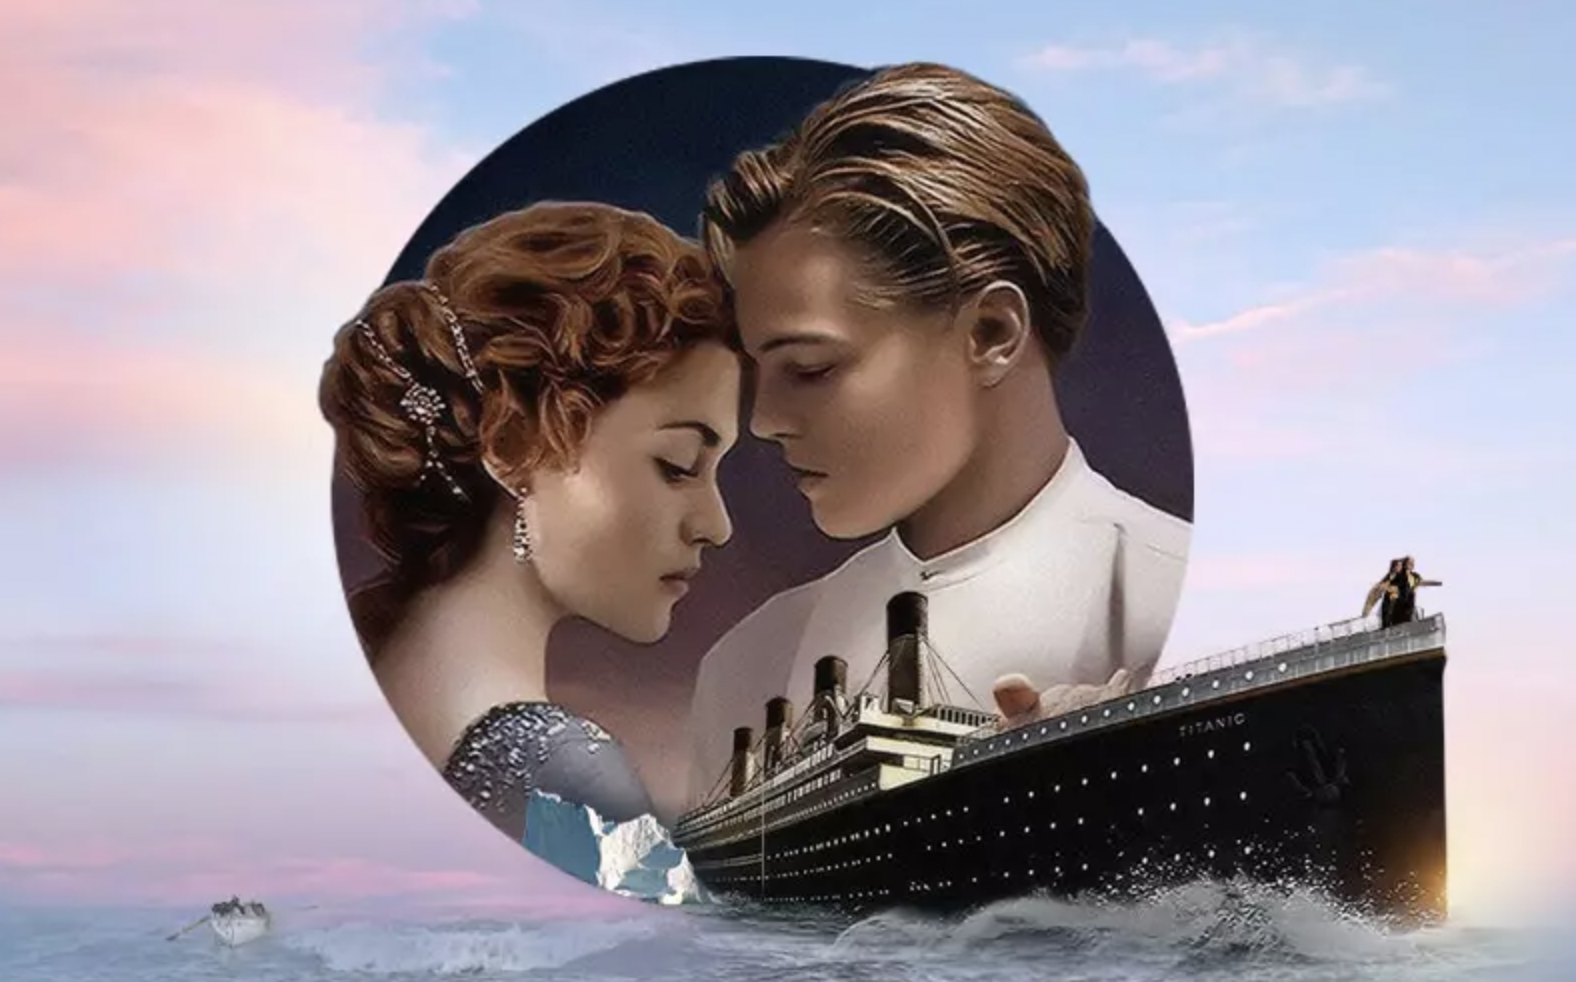

In [140]:
df1 = pd.read_csv('/Users/dhruvkumar/Desktop/titanic.csv')

In [141]:
# dir(df1)

In [142]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


__survival - Survival (0 = No; 1 = Yes)    
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)   
name - Name   
sex - Sex   
age - Age    
sibsp - Number of Siblings/Spouses Aboard    
parch - Number of Parents/Children Aboard      
ticket - Ticket Number     
fare - Passenger Fare     
cabin - Cabin    
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)    
boat - Lifeboat (if survived)     
body - Body number (if did not survive and body was recovered)__    

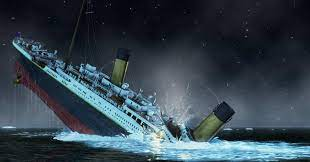

In [143]:
target = df1['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Critical Parameters    
__1)Pclass  
2)Sex  
3)Age  
4)Fare__

In [144]:
df2 = df1[['Pclass','Sex','Age','Fare']]
df2

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [145]:
# I will conver sex column in binary (0,1)
from sklearn.preprocessing import LabelEncoder
le_Sex = LabelEncoder()

In [146]:
df2['Sex_n'] = le_Sex.fit_transform(df2['Sex'])

<ipython-input-146-64a72317fa79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sex_n'] = le_Sex.fit_transform(df2['Sex'])


In [147]:
df2 # now, we will drop Sex

,Pclass,Sex,Age,Fare,Sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [148]:
fdf = df2.drop(['Sex'],axis='columns')

In [149]:
fdf  # Complete and fine dataset  Here, 1 is for Male and 0 is for female

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [150]:
fdf.Age.median()

28.0

In [151]:
fdf = fdf.fillna(fdf.Age.median())

In [152]:
fdf   # Now, we are left with a clean and data   # i will now group by male and female to take comaprision

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,28.0,23.4500,0
889,1,26.0,30.0000,1


In [153]:
fdf1 = fdf.groupby('Sex_n')

In [154]:
fdf1 = fdf1.mean()

In [155]:
fdf1

,Pclass,Age,Fare
Sex_n,,,
0,2.159236,27.929936,44.479818
1,2.389948,30.140676,25.523893


## Let's Bring up our ML model in picture.

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(fdf,target,test_size=0.3)

In [158]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [159]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [160]:
model.score(X_test,y_test)

0.7873134328358209

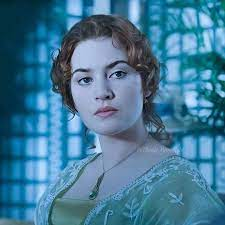

In [161]:
model.predict([[1,25,50,0]])   # Rose will survive.

array([1])

In [162]:
model.predict([[3,25,7,1]])   # he dies Feel sorry for him

array([1])

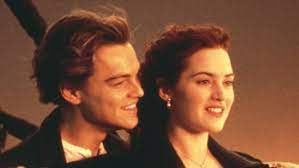

In [163]:
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier()

In [164]:
Rmodel.fit(X_train,y_train)

RandomForestClassifier()

In [165]:
Rmodel.score(X_test,y_test)

0.8208955223880597

In [166]:
Rmodel.predict([[1,25,50,0]])   # Rose will survive.

array([1])

In [167]:
Rmodel.predict([[3,25,7,1]])   #  he did not survive 

array([0])